## Time to get your hands dirty. The HR diagram

This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

This dataset has been collected by [Deepraj Baidya](https://github.com/deepraj1729) and was originally published on [Kaggle](https://www.kaggle.com/deepu1109/star-dataset). 

There are 6 star types that are encoded in the *'Star type'* column. These labels are currently encoded as strings which is practical for reading but not for computing. Using scikit-learn, we will convert this column into integers by assigning a unique int value to each star type.

We've seen this already last time. It is often grood practice to start with a statistical analysis of the dataset to answer the following questions:
* are there any missing values?
* are there NaNs in the data?

Star classification is something that can be done based on rules depending on temperature and luminosity. We can reproduce this diagram by plotting the scatter plot of our stars using the same variables in log-log-scale.

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

- Apply PCA to the dataset at your disposal (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning**: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?



### For later: come back to this assignment after lecture 20
- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.

In [83]:
import urllib.request
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x1d6f3b9ee90>)

In [85]:
df_stars = pd.read_csv("stars.csv")
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


In [86]:
le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels_star_type = le.inverse_transform(df_stars['Star type'])
class_names_star_type = le.classes_
print(class_names_star_type)
le = LabelEncoder()
df_stars['Star color'] = le.fit_transform(df_stars['Star color'])
labels_star_color = le.inverse_transform(df_stars['Star color'])
class_names_star_color  = le.classes_
print(class_names_star_color)
le = LabelEncoder()
df_stars['Spectral Class'] = le.fit_transform(df_stars['Spectral Class'])
labels_spectral_class = le.inverse_transform(df_stars['Spectral Class'])
class_names_spectral_class = le.classes_
print(class_names_spectral_class)

['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']
['Blue' 'Blue ' 'Blue White' 'Blue white' 'Blue white ' 'Blue-White'
 'Blue-white' 'Orange' 'Orange-Red' 'Pale yellow orange' 'Red' 'White'
 'White-Yellow' 'Whitish' 'Yellowish' 'Yellowish White' 'white'
 'yellow-white' 'yellowish']
['A' 'B' 'F' 'G' 'K' 'M' 'O']


In [36]:
df_stars.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

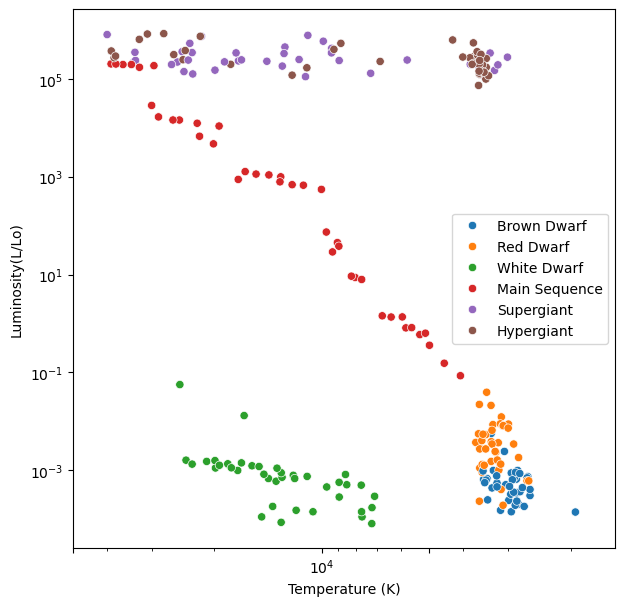

In [88]:
fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels_star_type)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

In [89]:
scaler = StandardScaler().set_output(transform="pandas")


X_train, X_test, y_train, y_test = train_test_split(df_stars.loc[:, 'Temperature (K)':'Absolute magnitude(Mv)'], df_stars['Star type'], test_size=0.3, random_state=42)
#X_train['Temperature (K)'] = np.log10(X_train['Temperature (K)'])
#X_train['Luminosity(L/Lo)'] = np.log10(X_train['Luminosity(L/Lo)'])
scaled_X_train = scaler.fit_transform(X_train)

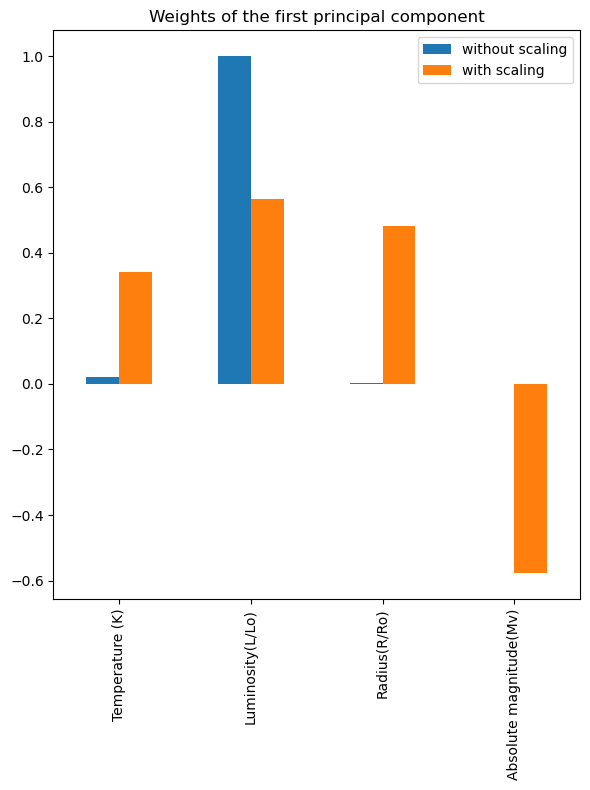

In [90]:
pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.fit_transform(X_train)
X_train_scaled_transformed = scaled_pca.fit_transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=df_stars.columns[0:4], columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)

_ = plt.tight_layout()

<Axes: >

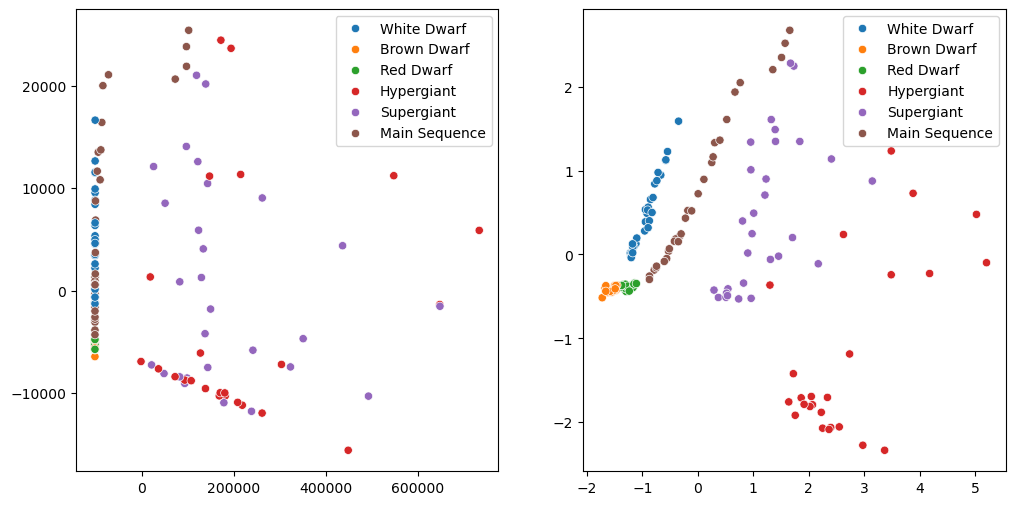

In [91]:
fig = plt.figure(figsize =(12,6))
ax = fig.add_subplot(1,2,1)
sns.scatterplot(x = X_train_transformed[:, 0], y = X_train_transformed[:,1], hue = class_names_star_type[y_train])

ax2 = fig.add_subplot(1,2,2)
sns.scatterplot(x = X_train_scaled_transformed[:, 0], y = X_train_scaled_transformed[:,1], hue = class_names_star_type[y_train])


Optimal C for the unscaled PCA: 0.0000

Optimal C for the standardized data with PCA: 784.76


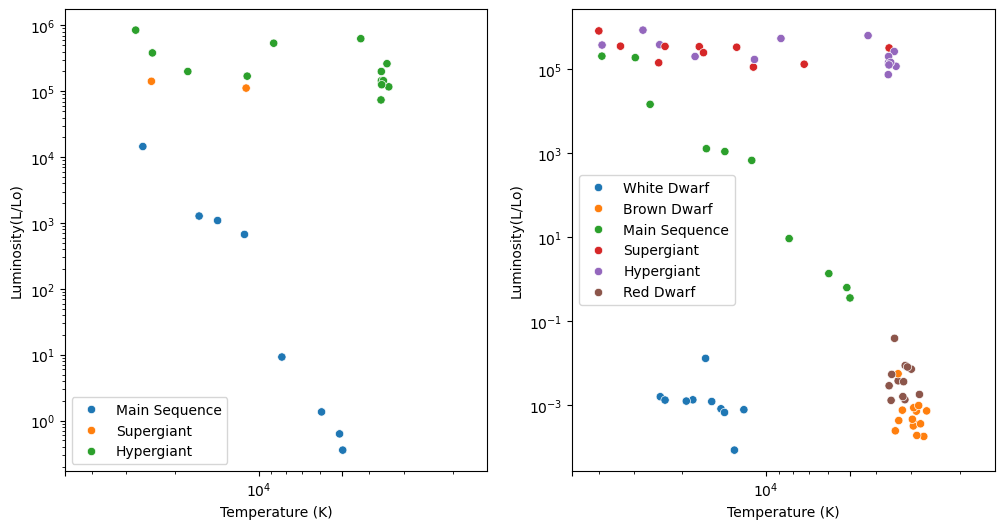

In [92]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

Cs = np.logspace(-5, 5, 20)

unscaled_clf = make_pipeline(pca, LogisticRegressionCV(Cs=Cs, solver = 'sag',max_iter=5000))
unscaled_clf.fit(X_train, y_train)

scaled_clf = make_pipeline(scaler, pca, LogisticRegressionCV(Cs=Cs, solver = 'sag',max_iter=5000))
scaled_clf.fit(X_train, y_train)

print(f"Optimal C for the unscaled PCA: {unscaled_clf[-1].C_[0]:.4f}\n")
print(f"Optimal C for the standardized data with PCA: {scaled_clf[-1].C_[0]:.2f}")

from sklearn.metrics import accuracy_score

y_pred = unscaled_clf.predict(X_test)
y_pred_scaled = scaled_clf.predict(X_test)
y_proba = unscaled_clf.predict_proba(X_test)
y_proba_scaled = scaled_clf.predict_proba(X_test)

fig = plt.figure(figsize =(12,6))
ax = fig.add_subplot(1,2,1)

condition = class_names_star_type[y_pred] == class_names_star_type[y_test]
sns.scatterplot(data=X_test[condition], x='Temperature (K)', y='Luminosity(L/Lo)', hue=class_names_star_type[y_pred][condition])
plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)

ax2 = fig.add_subplot(1,2,2)
condition = class_names_star_type[y_pred_scaled] == class_names_star_type[y_test]
sns.scatterplot(data = X_test[condition], x='Temperature (K)', y='Luminosity(L/Lo)', hue=class_names_star_type[y_pred_scaled][condition])
plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

In [93]:
print("Test accuracy for the unscaled PCA")
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print("Test accuracy for the standardized data with PCA")
print(f"{accuracy_score(y_test, y_pred_scaled):.2%}\n")

Test accuracy for the unscaled PCA
33.33%

Test accuracy for the standardized data with PCA
98.61%



<Axes: >

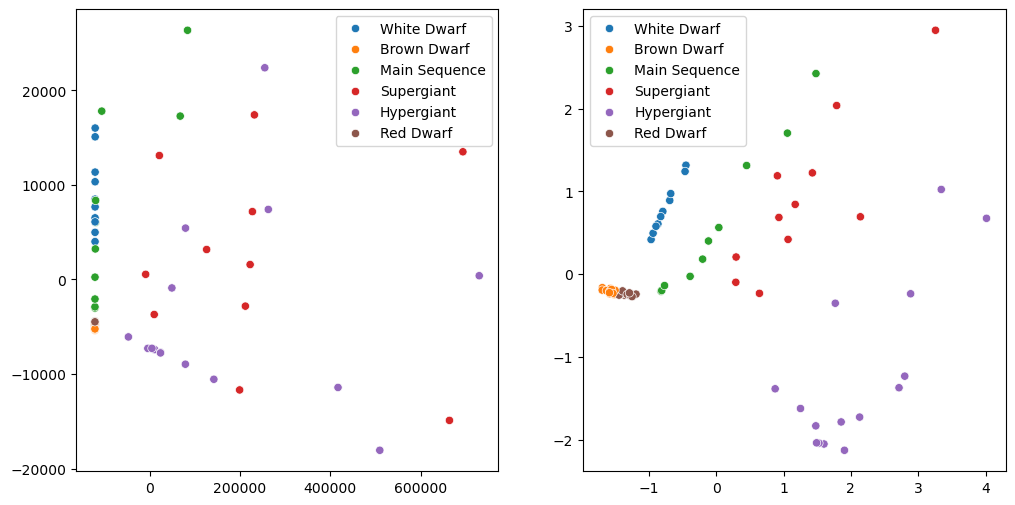

In [97]:
scaled_X_test = scaler.fit_transform(X_test)
X_test_transformed = pca.transform(X_test)
X_test_scaled_transformed = scaled_pca.transform(scaled_X_test)

fig = plt.figure(figsize =(12,6))
ax = fig.add_subplot(1,2,1)
sns.scatterplot(x = X_test_transformed[:, 0], y = X_test_transformed[:,1], hue = class_names_star_type[y_test])

ax2 = fig.add_subplot(1,2,2)
sns.scatterplot(x = X_test_scaled_transformed[:, 0], y = X_test_scaled_transformed[:,1], hue = class_names_star_type[y_test])